<a href="https://colab.research.google.com/github/ThunderBolt-OS/100-code/blob/main/Scrapper_Core_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1: Websites
2: Text

Enter your Choice: 2
Enter Text:Greetings GitHub Campus Expert Team, I am from K.J.Somaiya College of Engineering, Mumbai, currently majoring in Information Technology with a specialization in  Artificial Intelligence. I'm an Open-Source and AI Enthusiast, I love Astrophysics!  Being passionate about technology, and desire to learn more, collaborate on projects that could solve real-world problems, makes me who I am. I am working at a startup and I am familiar with technologies such as javascript, No

,Negative words,Positive Words,Neutral Words
0,problem,greeting,campus
1,doubt,intelligence,expert
2,struggle,enthusiast,team
3,lack,love,college
4,miss,passionate,engineering
...,...,...,...
151,None,None,looking
152,None,None,forward
153,None,None,hearing
154,None,None,education




Emotional Analysis


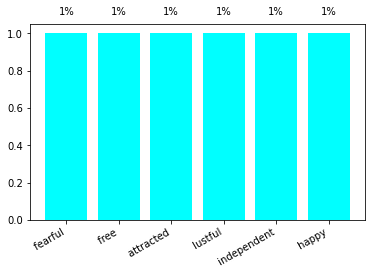

In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
import re
import nltk
from IPython.display import display
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# configuring nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

print("\n\n1: Websites\n2: Text")
switch=int(input("\nEnter your Choice: "))


# for website url input
if switch ==1:#(Dropdown)
  links=[]
  num_web = (input("Enter URL of websites seprated by comma: "))#input take websites
  links = num_web.split(",")
  # links = ['https://www.grammarly.com/','https://www.yourdictionary.com/', 'https://www.merriam-webster.com/', 'https://www.cambridge.org/', 'https://www.dictionary.com/', 'https://prowritingaid.com/' ,'https://www.gingersoftware.com/', 'https://sentencecheckup.com/']
  e = []
  for i in links:
      source = requests.get(i).text
      soup = BeautifulSoup(source, 'lxml')
      a = soup.body.text
      a = a.lower()
      b = a.split()
      e+=b #append all the website's words
  c = []
  d = []
  for i in e:
      if i not in d:
          c.append([i,e.count(i)])
          d.append(i)

  stopwords = nltk.corpus.stopwords.words('english')
  lst=[]
  for i in d:
    a=i.lower()
    lst.append(a)
  text = " ".join([word for word in lst if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text_a = [word for word in tokens if word not in stopwords] #removes basic grammar words
  texta = [wn.lemmatize(word) for word in text_a]
  final=list(texta)

  remove = str.maketrans('', '', string.punctuation)
  out_list = [s.translate(remove) for s in final]
  final1 = [x for x in out_list if not any(x1.isdigit() for x1 in x)] #checks if there are any numbers
  # print(len(final1))
  final2 = [x for x in final1 if len(x)>2]
  # print(len(final2))

  words = set(nltk.corpus.words.words()) 
  sent = ' '.join(final2)
  b = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
          if w.lower() in words or not w.isalpha()) #removes meaningless words
  f = b.split()
  g = []
  h = []
  for i in f:
      if i not in h:
          g.append([i,f.count(i)])
          h.append(i)
  # print(list(set(h)))
  # print(len(h))
  emote_list = []
  with open('/content/emot.txt','r') as files:
    for line in files:
      final_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()
      word,emotions = final_line.split(':')
      if word in h:
        emote_list.append(emotions)

  # print(emote_list)
  w = Counter(emote_list)
  # print(w)

  negl=[]
  posl=[]
  neul=[]
  for i in h:

    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if neg>pos:
      negl.append(i)
    elif pos>neg:
      posl.append(i)
    else:
      neul.append(i)

  a_dictionary = {"Neutral": 0, "Positive": 0, "Negative": 0}
  a_dictionary["Neutral"] = len(neul)
  a_dictionary["Positive"] = len(posl)
  a_dictionary["Negative"] = len(negl)
  max_key = max(a_dictionary, key=a_dictionary.get)
  print("\n\n")
  print("Overall Vibe is "+str(max_key)+" inclined towards "+ list(a_dictionary.keys())[list(a_dictionary.values()).index(sorted(a_dictionary.values())[-2])])#overall vibe


  # print(negl)
  # print(posl)
  # print(neul)

  a = {'Negative words': negl ,'Positive Words': posl , 'Neutral Words': neul }
  percentile_list = pd.DataFrame.from_dict(a, orient='index')
  percentile_list.T.to_csv('/content/sample_data/data',index = True)#saving CSV on local (custom)
  percentile_list = percentile_list.transpose()
  print("\n\n")
  display(percentile_list)#displays the pos,neg, table
  # print(percentile_list)
  

  fig,ax1 = plt.subplots()
  ax1.bar(w.keys(),w.values())
  fig.autofmt_xdate()
  # plt.savfig('graph.png')
  pps = ax1.bar(w.keys(), w.values(), align='center')
  for p in pps:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
        s="{}%".format(height),
        ha='center')
  print("\n\nEmotional Analysis")
  plt.show()#shows graph
  print(plt)


# for text input
elif switch==2:#(Dropdown)
  te=input("Enter Text:")#input take text
  d = list(te.split(" "))
  stopwords = nltk.corpus.stopwords.words('english')
  lst=[]
  for i in d:
    a=i.lower()
    lst.append(a)
  
  text = " ".join([word for word in lst if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text_a = [word for word in tokens if word not in stopwords]
  texta = [wn.lemmatize(word) for word in text_a]
  final=list(texta)

  remove = str.maketrans('', '', string.punctuation)
  out_list = [s.translate(remove) for s in final]
  final1 = [x for x in out_list if not any(x1.isdigit() for x1 in x)]
  # print(len(final1))
  final2 = [x for x in final1 if len(x)>2]
  # print(len(final2))

  words = set(nltk.corpus.words.words())
  sent = ' '.join(final2)
  b = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
          if w.lower() in words or not w.isalpha())
  f = b.split()
  g = []
  h = []
  for i in f:
      if i not in h:
          g.append([i,f.count(i)])
          h.append(i)
  # print(list(set(h)))
  # print(len(h))
  emote_list = []
  with open('/content/emot.txt','r') as files:
    for line in files:
      final_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()
      word,emotions = final_line.split(':')
      if word in h:
        emote_list.append(emotions)

  # print(emote_list)
  w = Counter(emote_list)
  # print(w)

  negl=[]
  posl=[]
  neul=[]
  for i in h:

    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if neg>pos:
      negl.append(i)
    elif pos>neg:
      posl.append(i)
    else:
      neul.append(i)

  a_dictionary = {"Neutral": 0, "Positive": 0, "Negative": 0}
  a_dictionary["Neutral"] = len(neul)
  a_dictionary["Positive"] = len(posl)
  a_dictionary["Negative"] = len(negl)
  max_key = max(a_dictionary, key=a_dictionary.get)
  print("\n\n")
  print("Overall Vibe is "+str(max_key)+" inclined towards "+ list(a_dictionary.keys())[list(a_dictionary.values()).index(sorted(a_dictionary.values())[-2])])#overall vibe
  # print(max_key)


  # print(negl)
  # print(posl)
  # print(neul)

  a = {'Negative words': negl ,'Positive Words': posl , 'Neutral Words': neul }
  percentile_list = pd.DataFrame.from_dict(a, orient='index')
  percentile_list.T.to_csv('/content/sample_data/data',index = True)#saving CSV on local (custom)
  percentile_list = percentile_list.transpose()
  # print(percentile_list)
  print("\n\n")
  display(percentile_list)#displays the pos,neg, table

  fig,ax1 = plt.subplots()
  ax1.bar(w.keys(),w.values())
  fig.autofmt_xdate()
  # plt.savfig('graph.png')
  pps = ax1.bar(w.keys(), w.values(), align='center',color=['cyan'])
  for p in pps:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
        s="{}%".format(height),
        ha='center')
  print("\n\nEmotional Analysis")
  plt.show()#shows graph


